<h2>Load data</h2>

In [11]:
from numpy import loadtxt
import numpy as np

# load data
import pandas as pd
df = pd.read_csv('data/glass.csv')
np_data = df.values

# split data into X and y
X_raw = np_data[:,0:9]
Y = pd.factorize(np_data[:,9])[0]

# Normalize attributes
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X_raw.astype(np.float64))

# set seed to randomizer
seed = 7

# Show min, max and range of attributes
attr_min = X.min(0)
attr_max = X.max(0)
attr_range = attr_max - attr_min
print(attr_min)
print(attr_max)
print(attr_range)

[-2.38151559 -3.28694275 -1.86551055 -2.31861565 -3.67647162 -0.76391864
 -2.48408356 -0.35287683 -0.5864509 ]
[5.13723188 4.87563749 1.25463857 4.12585061 3.57052422 8.78014487
 5.09431802 5.99721046 4.65988118]
[7.51874747 8.16258024 3.12014912 6.44446626 7.24699583 9.54406351
 7.57840158 6.35008729 5.24633208]


<h2>Function for evaluating model accuracy</h2>

In [30]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

def evaluate(model):
    print("-- Training data --")
    # train model on training dataset
    model.fit(X, Y)
    # evaluate dataset
    y_pred = model.predict(X)
    predictions = [round(value) for value in y_pred]
    # calculate accuracy
    accuracy = accuracy_score(Y, predictions)
    print("Accuracy: %.2f%%" % (accuracy * 100.0))
    # confusion matrix
    print("Confusion Matrix:")
    conf_mx = confusion_matrix(Y, y_pred)
    print(conf_mx)
    # Visualize (normalized) confusion matrix
    row_sums = conf_mx.sum(axis=1, keepdims=True)
    norm_conf_mx = conf_mx / row_sums
    plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
    plt.show()
    
    print("")
    print("-- 10-fold CV --")
    # 10-fold CV
    y_pred = cross_val_predict(model, X, Y, cv=10)
    # calculate accuracy
    predictions = [round(value) for value in y_pred]
    accuracy = accuracy_score(Y, predictions)
    print("Average accuracy: %.2f%%" % (accuracy * 100.0))
    # confusion matrix
    print("Confusion Matrix:")
    conf_mx = confusion_matrix(Y, y_pred)
    print(conf_mx)
    # Visualize (normalized) confusion matrix
    row_sums = conf_mx.sum(axis=1, keepdims=True)
    norm_conf_mx = conf_mx / row_sums
    plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
    plt.show()

<h2>Linear classifier</h2>

-- Training data --
Accuracy: 69.63%
Confusion Matrix:
[[52  0  0 18  0  0]
 [ 8  0  0  9  0  0]
 [ 0  0  9  0  0  0]
 [17  3  1 50  0  5]
 [ 0  0  0  1 28  0]
 [ 0  0  0  2  1 10]]


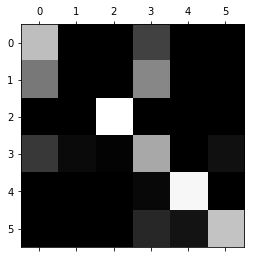


-- 10-fold CV --
Average accuracy: 65.89%
Confusion Matrix:
[[52  2  0 16  0  0]
 [ 8  0  0  9  0  0]
 [ 0  0  9  0  0  0]
 [19  0  2 50  1  4]
 [ 2  0  0  1 25  1]
 [ 0  1  0  6  1  5]]


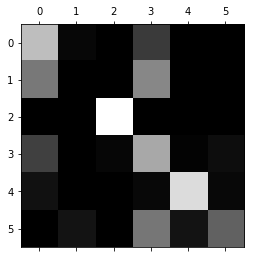

In [31]:
from sklearn import linear_model

# train model
model = linear_model.SGDClassifier(max_iter=2000, random_state=seed)
evaluate(model)

<h2>Neural Network classifier</h2>

-- Training data --
Accuracy: 78.04%
Confusion Matrix:
[[56  1  0 13  0  0]
 [ 8  0  0  9  0  0]
 [ 0  0  9  0  0  0]
 [13  0  0 63  0  0]
 [ 1  0  0  0 28  0]
 [ 0  0  0  2  0 11]]


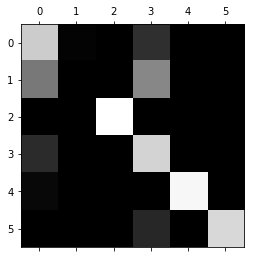


-- 10-fold CV --
Average accuracy: 70.09%
Confusion Matrix:
[[53  3  0 13  1  0]
 [ 5  8  0  4  0  0]
 [ 0  0  7  1  0  1]
 [19  3  1 50  0  3]
 [ 0  0  0  4 24  1]
 [ 0  0  0  5  0  8]]


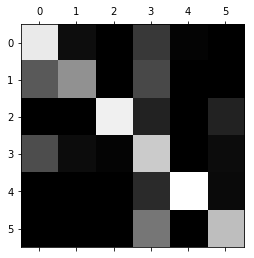

In [32]:
from sklearn.neural_network import MLPClassifier

# train model
model = MLPClassifier(max_iter=2000, random_state=seed)
evaluate(model)

<h2>Decision Tree classifier</h2>

-- Training data --
Accuracy: 83.64%
Confusion Matrix:
[[63  0  0  6  1  0]
 [ 7  5  0  5  0  0]
 [ 2  0  5  2  0  0]
 [ 3  0  2 69  1  1]
 [ 1  0  1  1 26  0]
 [ 0  0  0  1  1 11]]


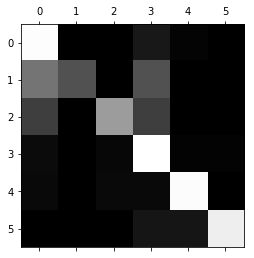


-- 10-fold CV --
Average accuracy: 71.03%
Confusion Matrix:
[[58  2  0  9  1  0]
 [ 7  4  0  6  0  0]
 [ 2  0  4  3  0  0]
 [18  3  2 50  1  2]
 [ 1  0  2  1 25  0]
 [ 0  0  0  1  1 11]]


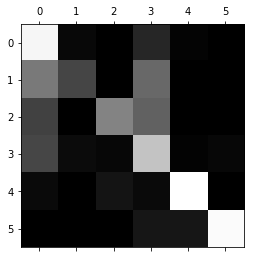

In [37]:
from sklearn.tree import DecisionTreeClassifier

# train model
model = DecisionTreeClassifier(min_samples_leaf=5, random_state=seed)
evaluate(model)

<h2>SVM classifier</h2>

-- Training data --
Accuracy: 78.97%
Confusion Matrix:
[[59  0  0 11  0  0]
 [10  0  0  7  0  0]
 [ 0  0  8  1  0  0]
 [15  0  0 61  0  0]
 [ 1  0  0  0 28  0]
 [ 0  0  0  0  0 13]]


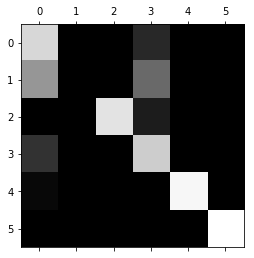


-- 10-fold CV --
Average accuracy: 71.03%
Confusion Matrix:
[[57  0  0 13  0  0]
 [ 9  0  0  8  0  0]
 [ 1  0  4  3  0  1]
 [20  0  0 56  0  0]
 [ 1  0  0  3 25  0]
 [ 0  0  0  2  1 10]]


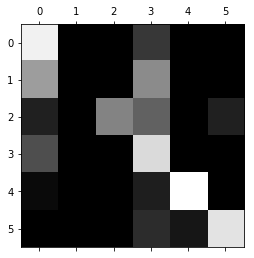

In [38]:
from sklearn import svm

# train model
model = svm.SVC(random_state=seed)
evaluate(model)

<h2>kNN classifier</h2>

-- Training data --
Accuracy: 83.64%
Confusion Matrix:
[[70  0  0  0  0  0]
 [ 6 11  0  0  0  0]
 [ 0  0  9  0  0  0]
 [14  5  1 56  0  0]
 [ 1  0  1  3 24  0]
 [ 1  0  0  2  1  9]]


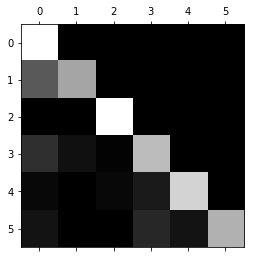


-- 10-fold CV --
Average accuracy: 70.09%
Confusion Matrix:
[[62  3  0  5  0  0]
 [11  5  0  1  0  0]
 [ 0  0  8  1  0  0]
 [21  8  1 45  0  1]
 [ 3  0  0  2 24  0]
 [ 1  0  0  3  3  6]]


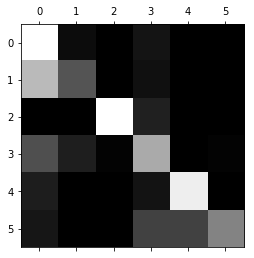

In [40]:
from sklearn.neighbors import KNeighborsClassifier

# train model
model = KNeighborsClassifier(n_neighbors=2)
evaluate(model)

<h2>XGBoost classifier</h2>

-- Training data --
Accuracy: 100.00%
Confusion Matrix:
[[70  0  0  0  0  0]
 [ 0 17  0  0  0  0]
 [ 0  0  9  0  0  0]
 [ 0  0  0 76  0  0]
 [ 0  0  0  0 29  0]
 [ 0  0  0  0  0 13]]


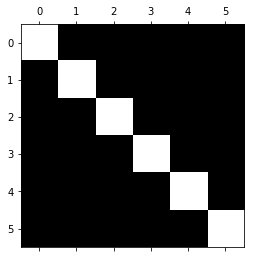


-- 10-fold CV --
Average accuracy: 77.10%
Confusion Matrix:
[[57  4  0  9  0  0]
 [ 8  5  0  4  0  0]
 [ 0  0  8  0  0  1]
 [10  2  1 61  1  1]
 [ 1  0  0  2 25  1]
 [ 0  0  0  3  1  9]]


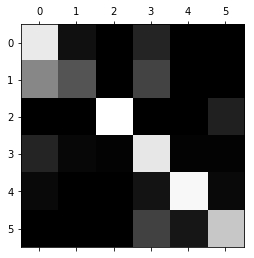

In [41]:
from xgboost import XGBClassifier

# Ignore deprecation warnings
import warnings
warnings.filterwarnings("ignore", category=Warning)

# train model
model = XGBClassifier(random_state=seed)
evaluate(model)

<h2>Plot attributes</h2>

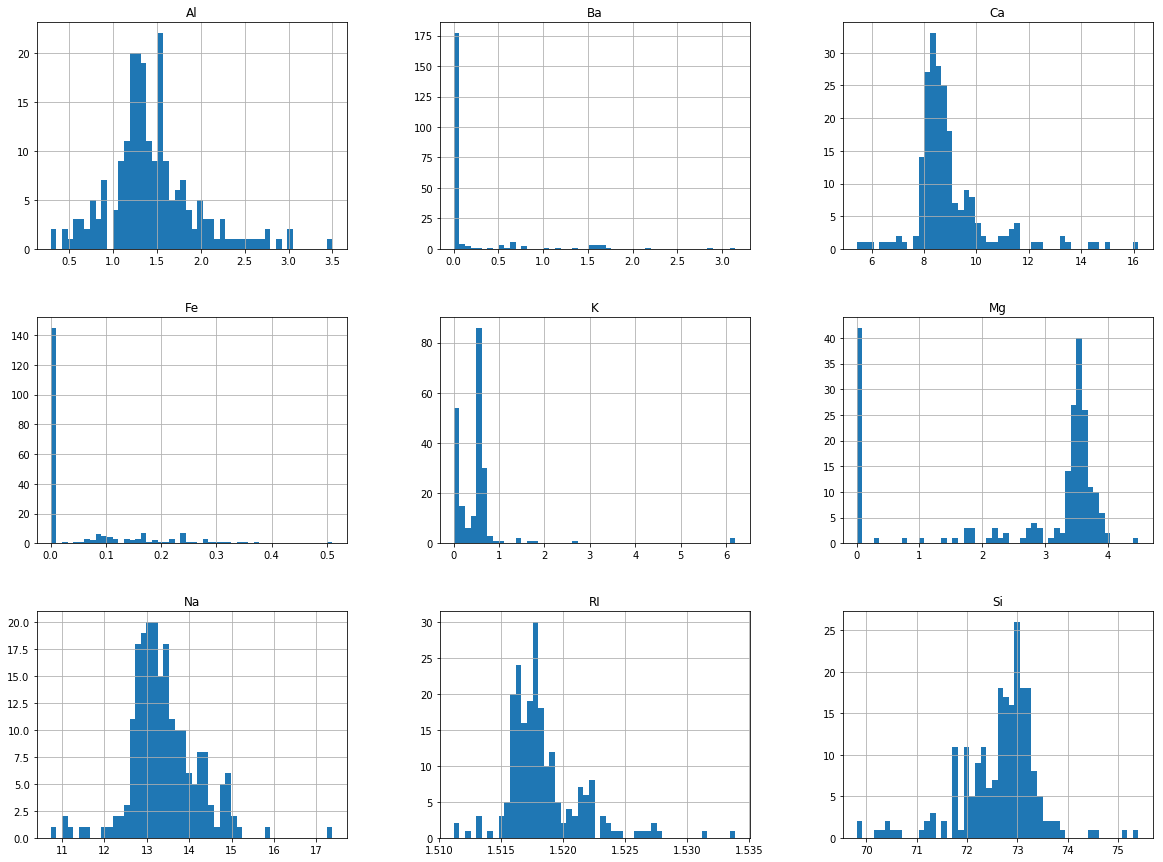

In [42]:
%matplotlib inline
import matplotlib.pyplot as plt
df.hist(bins=50, figsize=(20,15))
plt.show()